In [3]:
# Install dependencies (include community integrations)
!pip install -U langchain langchain-community langchain_groq pillow

  Using cached langchain_community-0.3.25-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63


In [7]:
# Imports
from PIL import Image
from langchain_groq import ChatGroq
from langchain.prompts.chat import (
    ChatPromptTemplate,
    ChatMessagePromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate
)
from langchain_core.messages import HumanMessage # Import HumanMessage ImagePromptTemplate
from IPython.display import display, Markdown

In [23]:
# Define the image path
image_path = "/content/Regional_Dashboard-1024x795.png"

# Convert image to base64-encoded data URL
def image_to_data_url(image_path):
    with open(image_path, "rb") as img_file:
        encoded = base64.b64encode(img_file.read()).decode("utf-8")
        return f"data:image/png;base64,{encoded}"

image_data_url = image_to_data_url(image_path)

In [24]:
from google.colab import userdata
api_key = userdata.get("GROQ_API_KEY")  # or use: api_key = "sk-..."

# Initialize Groq LLM
llm = ChatGroq(
    model="meta-llama/llama-4-maverick-17b-128e-instruct",
    api_key=api_key,
    temperature=0,
)

In [25]:
system_msg = SystemMessagePromptTemplate.from_template(
    "You are a data analyst assistant that interprets dashboards from images and gives precise insights."
)

# Message with image and text in LangChain-compatible format
human_message_with_image = HumanMessage(
    content=[
        {"type": "image_url", "image_url": {"url": image_data_url}},  # Correct usage
        {"type": "text", "text": "What are the top 3 products by revenue in this dashboard, and what are their approximate values?"}
    ]
)

chat_prompt = ChatPromptTemplate.from_messages([
    system_msg,
    human_message_with_image
])

[SystemMessage(content='You are a data analyst assistant that interprets dashboards from images and gives precise insights.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content=[{'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'text', 'text': 'What are the top 3 products by revenue in this dashboard, and what are their approximate values?'}], additional_kwargs={}, response_metadata={})]
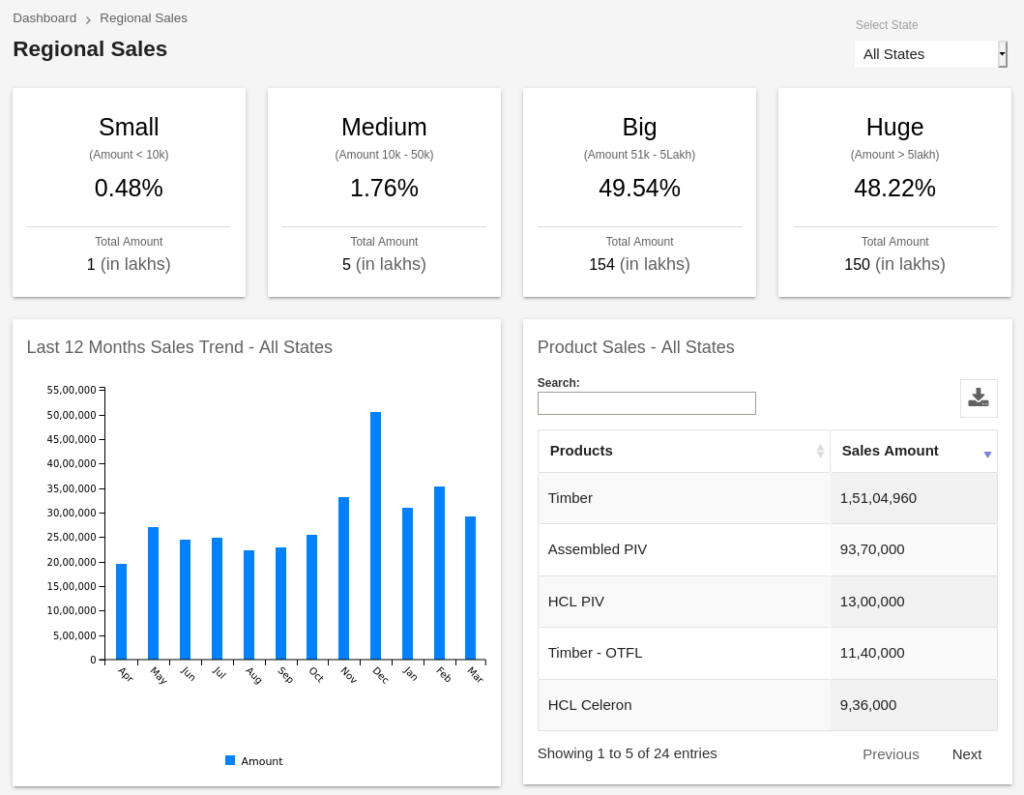

In [26]:
# Format the prompt with the user's question
messages = chat_prompt.format_messages()
messages

In [27]:
# Invoke LLM and display response
response = llm.invoke(messages)
response

AIMessage(content='**Top 3 Products by Revenue**\n\nThe top 3 products by revenue in this dashboard are:\n\n1. **Timber**: 1,51,04,960\n2. **Assembled PIV**: 93,70,000\n3. **HCL PIV**: 13,00,000\n\nThese values are approximate and based on the data presented in the "Product Sales - All States" table.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1938, 'total_tokens': 2025, 'completion_time': 0.215700854, 'prompt_time': 0.039585383, 'queue_time': 0.255546807, 'total_time': 0.255286237}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_c527aa4474', 'finish_reason': 'stop', 'logprobs': None}, id='run--e97a145f-116c-4d60-acff-a17ff4df038a-0', usage_metadata={'input_tokens': 1938, 'output_tokens': 87, 'total_tokens': 2025})

In [29]:
display(Markdown("### Groq Vision Analysis"))
display(Markdown(response.content))

### Groq Vision Analysis

**Top 3 Products by Revenue**

The top 3 products by revenue in this dashboard are:

1. **Timber**: 1,51,04,960
2. **Assembled PIV**: 93,70,000
3. **HCL PIV**: 13,00,000

These values are approximate and based on the data presented in the "Product Sales - All States" table.